In [10]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import os
import soundfile as sf
import librosa.display as display

In [14]:
directory = '/scratch/rrs432/openmic/openmic-2018/audio/000'
os.chdir(directory)
!ls

000046_3840_dd.npy    000396_821760_dd.npy  000655_299520_dd.npy
000046_3840_d.npy     000396_821760_d.npy   000655_299520_d.npy
000046_3840_m.npy     000396_821760_m.npy   000655_299520_m.npy
000046_3840.npy       000396_821760.npy     000655_299520.npy
000046_3840.ogg       000396_821760.ogg     000655_299520.ogg
000135_483840_dd.npy  000399_111360_dd.npy  000661_253440_dd.npy
000135_483840_d.npy   000399_111360_d.npy   000661_253440_d.npy
000135_483840_m.npy   000399_111360_m.npy   000661_253440_m.npy
000135_483840.npy     000399_111360.npy     000661_253440.npy
000135_483840.ogg     000399_111360.ogg     000661_253440.ogg
000139_119040_dd.npy  000403_0_dd.npy	    000663_211200_dd.npy
000139_119040_d.npy   000403_0_d.npy	    000663_211200_d.npy
000139_119040_m.npy   000403_0_m.npy	    000663_211200_m.npy
000139_119040.npy     000403_0.npy	    000663_211200.npy
000139_119040.ogg     000403_0.ogg	    000663_211200.ogg
000141_153600_dd.npy  000404_487680_dd.npy  000685_215040_dd.npy
00

In [16]:
arr = np.load('000046_3840.npy')
print(np.shape(arr))
print(arr)

mean = np.mean(arr, axis=1)
std = np.std(arr, axis=1)
mini = np.min(arr, axis=1)
maxi = np.max(arr, axis=1)

new_row = np.concatenate((mean,std,mini,maxi))
new_row[np.newaxis, :]
#print(mean)

# print(np.shape(mean))
# print(mean)
# print(np.shape(std))
# print(std)
# print(np.shape(mini))
# print(mini)
# print(np.shape(maxi))
# print(maxi)

(20, 862)
[[-5.79499281e+02 -5.79499281e+02 -4.86619824e+02 ... -1.53399886e+02
  -1.51686728e+02 -1.42259229e+02]
 [-4.61852778e-14 -4.61852778e-14  1.03727266e+02 ...  1.84985842e+02
   1.84376039e+02  1.94645133e+02]
 [ 4.79616347e-14  4.79616347e-14  4.60065311e+01 ... -1.32698789e+01
  -1.43169107e+01 -1.44128028e+01]
 ...
 [-5.32907052e-14 -5.32907052e-14  1.22837402e+01 ...  1.87056848e+01
   1.64693894e+01  1.97392601e+01]
 [ 1.06581410e-14  1.06581410e-14  6.59537532e+00 ... -3.13749934e+00
  -1.31206048e+00 -1.56535999e+00]
 [ 3.73034936e-14  3.73034936e-14 -3.09255930e+00 ... -1.26108280e+01
  -1.50906661e+01 -1.25886543e+01]]


array([[-2.90512330e+02,  1.74908528e+02,  1.24429184e+01,
         1.47282040e+01,  3.67794825e-01,  9.34473480e+00,
        -1.30901347e+01, -2.17755272e+00, -1.29697584e+01,
        -5.53074164e+00, -7.93147301e-01,  7.75855467e+00,
         8.35095309e+00,  3.99119655e+00,  7.13035760e-01,
        -2.03982480e+00, -6.76253379e-01,  9.66720036e-01,
        -2.66207659e+00, -2.89482704e+00,  9.65691031e+01,
         2.76371061e+01,  2.18817047e+01,  2.63670218e+01,
         1.30329512e+01,  2.15302825e+01,  1.12492343e+01,
         1.09570512e+01,  8.80112003e+00,  9.22966238e+00,
         7.27302084e+00,  8.25254276e+00,  1.07824861e+01,
         9.17187547e+00,  8.01391704e+00,  1.58976397e+01,
         1.73623357e+01,  1.34968151e+01,  7.82871257e+00,
         6.12124947e+00, -5.79499281e+02, -4.61852778e-14,
        -3.34459854e+01, -3.19935158e+01, -3.70455359e+01,
        -2.53813202e+01, -4.43263279e+01, -2.57317098e+01,
        -3.28137249e+01, -2.41859210e+01, -2.73623656e+0

In [20]:
a = []
print(np.size(a))

0


In [22]:
rootdir = '/scratch/rrs432/openmic/openmic-2018/audio/'
train = []

for subdir, dirs, files in os.walk(rootdir):
    for filename in os.listdir(subdir):        
        if filename.endswith("0.npy"): 
            os.chdir(subdir)
            arr = np.load(filename)
            mean = np.mean(arr, axis=1)
            std = np.std(arr, axis=1)
            mini = np.min(arr, axis=1)
            maxi = np.max(arr, axis=1)
            new_row = np.concatenate((mean,std,mini,maxi))
            new_row[np.newaxis, :]
            if np.size(train) is 0:
                train = new_row
            else:
                train = np.vstack([train, new_row])

In [23]:
np.shape(train)

(20000, 80)

In [3]:
rootdir = '/scratch/rrs432/openmic/openmic-2018/audio/'

for subdir, dirs, files in os.walk(rootdir):
    for filename in os.listdir(subdir):        
        if filename.endswith(".ogg"): 
            os.chdir(subdir)
            y, sr = sf.read(filename)
            if y.ndim is 2:
                y = y.sum(axis=1)/2
            #mfcc = librosa.feature.mfcc(y=y, sr=sr)
            melspec = librosa.feature.melspectrogram(y=y, sr=sr)

            filename, file_extension = os.path.splitext(filename)
            filename = filename + '_m'
            
            #np.save(filename, mfcc)
            np.save(filename, melspec)

In [11]:
rootdir = '/scratch/rrs432/openmic/openmic-2018/audio/'

for subdir, dirs, files in os.walk(rootdir):
    for filename in os.listdir(subdir):        
        if filename.endswith(".ogg"): 
            os.chdir(subdir)
            y, sr = sf.read(filename)
            if y.ndim is 2:
                y = y.sum(axis=1)/2
            mfcc = librosa.feature.mfcc(y=y, sr=sr)
            mfcc_delta = librosa.feature.delta(mfcc)
            mfcc_delta2 = librosa.feature.delta(mfcc,order=2)
            #melspec = librosa.feature.melspectrogram(y=y, sr=sr)

            filename, file_extension = os.path.splitext(filename)
            filename = filename + '_d'
            
            #np.save(filename, mfcc)
            #np.save(filename, melspec)
            np.save(filename,mfcc_delta)
            
            filename = filename + 'd'
            np.save(filename,mfcc_delta2)

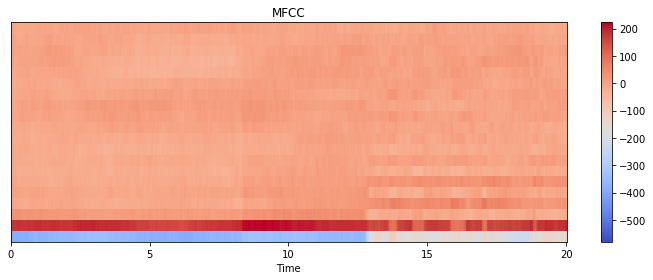

In [22]:
plt.figure(figsize=(10, 4))
display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()